In [1]:
import os
import shutil
import json
import numpy as np
from tqdm import tqdm
from PIL import Image
import cv2, zlib, base64, io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from ultralytics.data.converter import convert_segment_masks_to_yolo_seg

In [2]:
def base64_2_mask(s):
    z = zlib.decompress(base64.b64decode(s))
    n = np.fromstring(z, np.uint8)
    mask = cv2.imdecode(n, cv2.IMREAD_UNCHANGED)[:, :, 3].astype(bool)
    return mask

def mask_2_base64(mask):
    img_pil = Image.fromarray(np.array(mask, dtype=np.uint8))
    img_pil.putpalette([0,0,0,255,255,255])
    bytes_io = io.BytesIO()
    img_pil.save(bytes_io, format='PNG', transparency=0, optimize=0)
    bytes = bytes_io.getvalue()
    return base64.b64encode(zlib.compress(bytes)).decode('utf-8')

In [3]:
def save_mask(mask, path):
    mask_img = (mask).astype(np.uint8)
    mask_img = Image.fromarray(mask_img)
    mask_img.save(path)
    # mask_img.save('./masks/mask_image.png')

In [4]:
def get_mask(text_file_path):
    labels = None
    with open(text_file_path) as json_file:
        labels = json.load(json_file)

    mask = np.zeros((labels['size']['height'], labels['size']['width']), dtype=np.float32)
    if len(labels["objects"]) == 0:
        return mask
        
    mask_str = labels['objects'][0]['bitmap']['data']
    mask_small = base64_2_mask(mask_str)
    
    # mask = np.zeros((720, 1280))
    start_point = labels['objects'][0]['bitmap']['origin']
    
    mask[
        start_point[1] : start_point[1] + mask_small.shape[0], 
        start_point[0] : start_point[0] + mask_small.shape[1]
    ] = mask_small

    return mask

In [5]:
mask = get_mask('./annotations/0e810pof0xtebym.png.json')
# mask = get_mask('./annotations/0069fqzjts4t90w.png.json')

C:\Users\syeda\AppData\Local\Temp\ipykernel_7396\3759507533.py:3: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  n = np.fromstring(z, np.uint8)


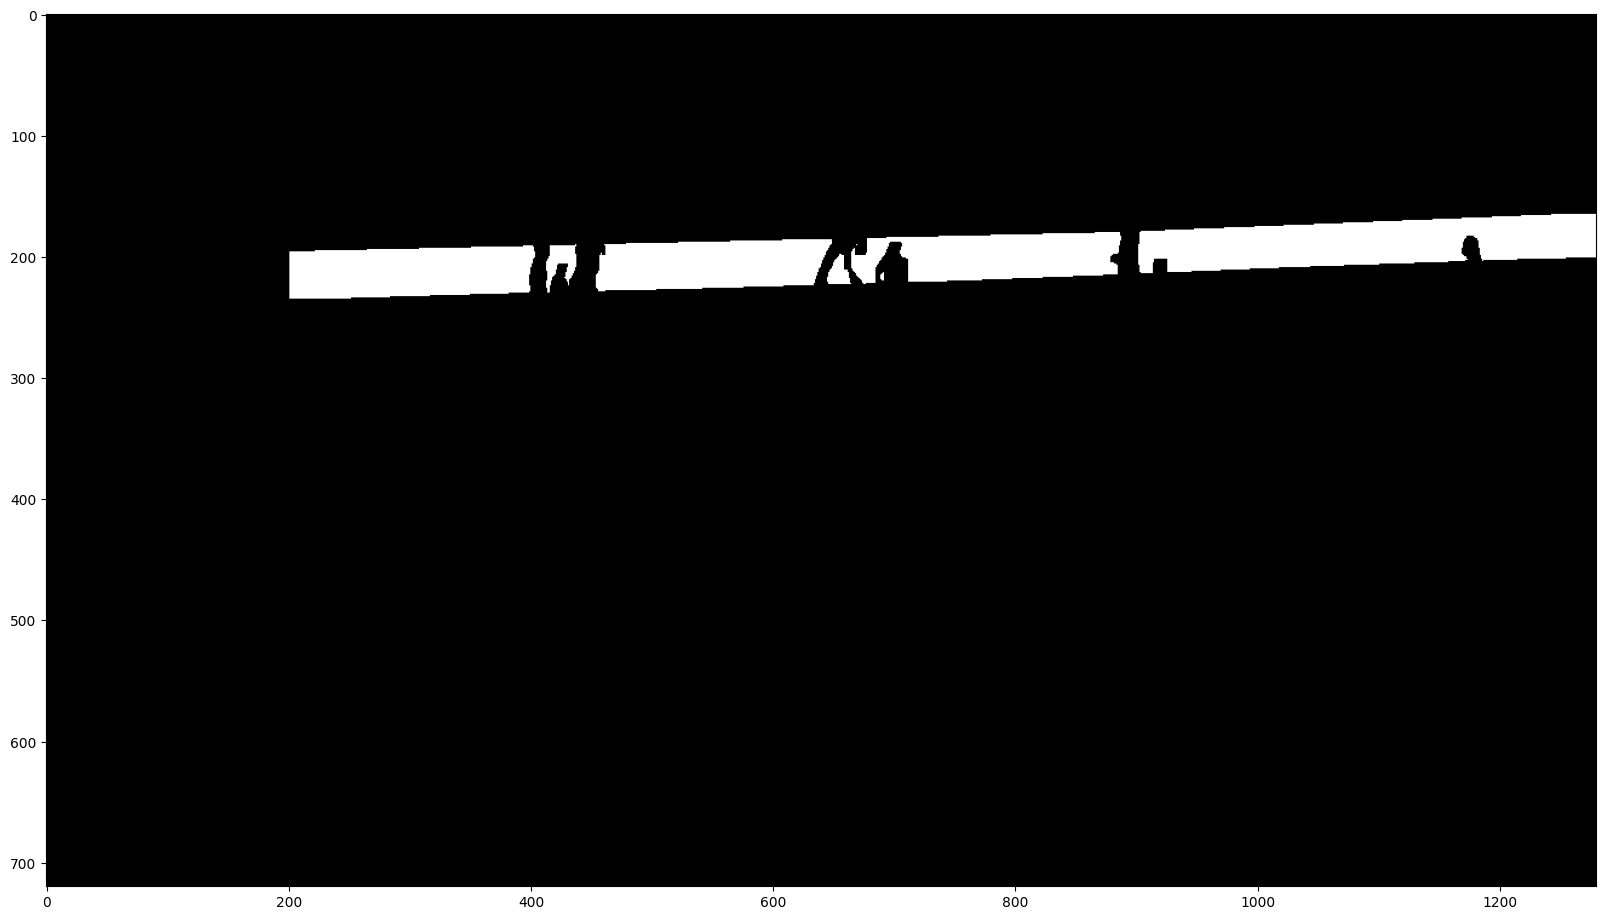

In [6]:
plt.figure(figsize=(20,12))
plt.imshow(mask, cmap='gray')

In [7]:
ANN_PATH = './annotations/'
IMG_PATH = './images/'
MASK_DIR = './input_masks/'

img_files = [file_name for file_name in os.listdir(IMG_PATH)]
ann_files = [file_name.replace('.json', '') for file_name in os.listdir(ANN_PATH)]

for i, ann in enumerate(ann_files):
    if ann not in img_files:
        print(f"{i}. {ann}")

print('----------------------------------------------')
for i, img in enumerate(img_files):
    if img not in ann_files:
        print(f"{i}. {img}")

52. 03nnw0eeojcl2ft.png
86. 07qxp74x991mwqf.png
89. 07wu2vzq7yjpmno.png
99. 09696ecb4uzxhac.png
111. 0a4e7fhql48x59t.png
293. 0h0u2u5guhac5gg.png
403. 0nlh2si8t65h89v.png
532. 0u2r05znf64r9un.png
580. 0x1q4acv5cfd5uv.png
702. 14l1mvj05cq01w2.png
921. 1l084q4gnswsemm.png
951. 1mvi80lsgh941to.png
1026. 1rbnqe0ed6qlbio.png
1039. 1szvguuhx35siah.png
1165. 26htgo6w0rw2rzl.png
1170. 27uvu7aresiipax.png
1205. 2bqz7qqheqfrq1p.png
1207. 2btqrapd0xw592f.png
1440. 2ws0updi2nkyk3h.png
1451. 2y1wmfbo9s3my7n.png
1465. 30ox27xlhjz23p1.png
1567. 3b5xlhpz41vpwzu.png
1802. 3ts13tjtjvr8cby.png
1805. 3u94l33nhsl6na4.png
1882. 49tj24pphr5bj7y.png
1892. 4ac5a7ez72bppk8.png
1913. 4bfltl15m5uu8f1.png
2015. 4ic59f5ksemvozc.png
2132. 4rntytra09a0lrh.png
2232. 51tbtgm3skynrm0.png
2313. 5cq19ki7pc3pn0s.png
2318. 5ex0t1gek98aulx.png
2530. 6280ysjxq4l7yu6.png
2559. 67bhbb5p2qfx3og.png
2612. 6dbrwwx8002lm6c.png
2637. 6k1zbqgb0re63vm.png
2641. 6l03vira3qvwl20.png
2693. 6xwyhury2iqdpbx.png
2710. 71gen3rcepb2r94.png
27

In [8]:
for ann in tqdm(ann_files):
    if ann in img_files:
        # print(ann)
        mask = get_mask(ANN_PATH+ann+'.json')
        save_mask(mask, MASK_DIR+ann)

  0%|                                                                                         | 0/8936 [00:00<?, ?it/s]C:\Users\syeda\AppData\Local\Temp\ipykernel_26696\3759507533.py:3: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  n = np.fromstring(z, np.uint8)
100%|█████████████████████████████████████████████████████████████████████████████| 8936/8936 [00:58<00:00, 152.85it/s]


In [ ]:
convert_segment_masks_to_yolo_seg(masks_dir="./input_masks/", output_dir="./masks/", classes=1)

Processing input_masks\004f03mh0td9rm1.png imgsz = 720 x 1280
Processed and stored at masks\004f03mh0td9rm1.txt imgsz = 720 x 1280
Processing input_masks\0069fqzjts4t90w.png imgsz = 720 x 1280
Processed and stored at masks\0069fqzjts4t90w.txt imgsz = 720 x 1280
Processing input_masks\006npw4orve4xtm.png imgsz = 720 x 1280
Processed and stored at masks\006npw4orve4xtm.txt imgsz = 720 x 1280
Processing input_masks\009t615waiblau1.png imgsz = 720 x 1280
Processed and stored at masks\009t615waiblau1.txt imgsz = 720 x 1280
Processing input_masks\00bhhxx56ft6rtq.png imgsz = 720 x 1280
Processed and stored at masks\00bhhxx56ft6rtq.txt imgsz = 720 x 1280
Processing input_masks\00c96j93cexdp56.png imgsz = 720 x 1280
Processed and stored at masks\00c96j93cexdp56.txt imgsz = 720 x 1280
Processing input_masks\00dkuyxfza2dcqy.png imgsz = 720 x 1280
Processed and stored at masks\00dkuyxfza2dcqy.txt imgsz = 720 x 1280
Processing input_masks\00dyc216ost1011.png imgsz = 720 x 1280
Processed and stored 

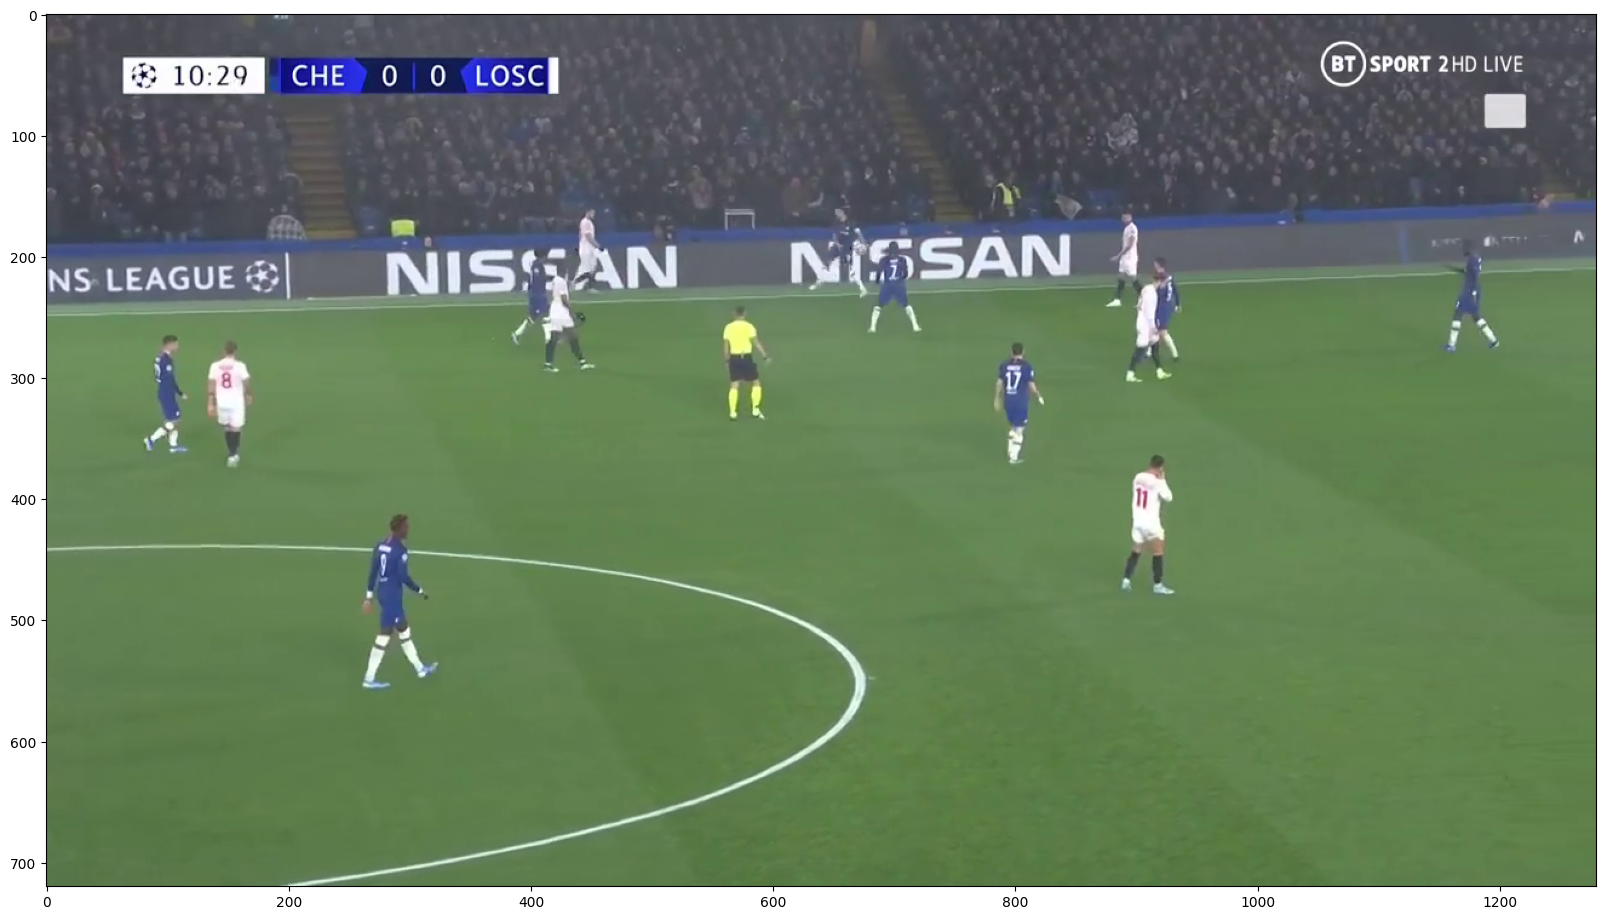

In [8]:
image = cv2.imread('./images/0e810pof0xtebym.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,12))
plt.imshow(image)

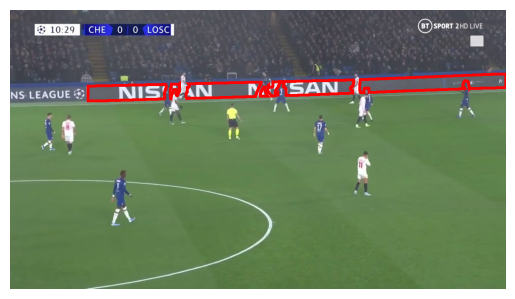

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
import cv2

txt_path = "./masks/0e810pof0xtebym.txt"

# Read the YOLO annotation file
with open(txt_path, 'r') as file:
    lines = file.readlines()

# Create a plot for the image
plt.imshow(image)
plt.axis('off')

# Parse each line in the annotation file and draw the polygons
for line in lines:
    parts = line.strip().split()  # Split the line into parts
    cls = int(parts[0])  # Class index
    num_points = len(parts[1:]) // 2  # Number of points (divide by 2 for x, y pairs)
    
    # Get the coordinates of the polygon (normalize to image size)
    coords = np.array(parts[1:], dtype=float).reshape((-1, 2))  # Reshape to (num_points, 2)
    
    # Assuming the coordinates are normalized, we scale them to the image size
    height, width, _ = image.shape
    coords *= [width, height]  # Scale to image size
    
    # Create a polygon and add it to the plot
    polygon = Polygon(coords, closed=True, fill=False, edgecolor='r', linewidth=2)
    plt.gca().add_patch(polygon)

# Display the image with the overlayed masks
plt.show()

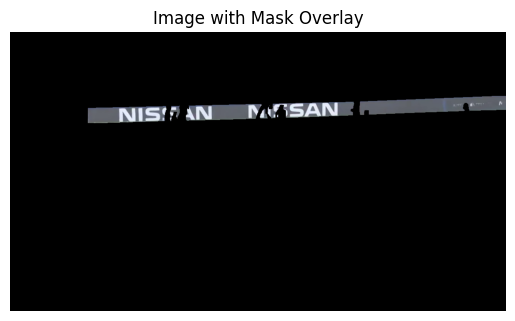

In [10]:
overlay = image.copy()
overlay[mask == 0] = [0, 0, 0]  # Change color where the mask is 1 (red)

plt.imshow(overlay)
plt.title('Image with Mask Overlay')
plt.axis('off')
plt.show()

In [11]:
len(ann_files)

8936

In [31]:
images_dir = "./images/"
masks_dir = "./masks/"
output_dir = "./Dataset/"

In [32]:
sorted(os.listdir(images_dir))

['004f03mh0td9rm1.png',
 '0069fqzjts4t90w.png',
 '006npw4orve4xtm.png',
 '009t615waiblau1.png',
 '00bhhxx56ft6rtq.png',
 '00c96j93cexdp56.png',
 '00dkuyxfza2dcqy.png',
 '00dyc216ost1011.png',
 '00ef64d94t0cbik.png',
 '00fkgxlxff8hd3z.png',
 '00i353yh47ake97.png',
 '00le3zaoyxa1j17.png',
 '00liigfbpzx5trg.png',
 '00m0w4rqcl052t3.png',
 '00m338hsoy78vli.png',
 '00myobl1mal5ujq.png',
 '00noqyowybnpjbs.png',
 '00ouzuz2u4l4wbk.png',
 '00rgyu6dakwb65q.png',
 '00vza6dqeatj00i.png',
 '00x6sn4wq9tvlt3.png',
 '00yt6iak8ytjjn8.png',
 '0152butwz5r2192.png',
 '016k0p70318jerl.png',
 '01acxc9qduatvcs.png',
 '01aqu1wuozys6t9.png',
 '01fv1weus48ial6.png',
 '01g8iyj38py21ed.png',
 '01hlckhl6njbbfw.png',
 '01mddq07hl0frfh.png',
 '01nfbx8qng0g6xx.png',
 '01r11wn0ptqknf5.png',
 '01rhw2ef7uyqwb1.png',
 '01rk3mbpd3p156z.png',
 '01v0lvyb9tlm12n.png',
 '01vx2f3318eppys.png',
 '01wto5pxar20760.png',
 '022ri68fj0g76h4.png',
 '02cadbok7oj5ib3.png',
 '02edy2hprx3c2wp.png',
 '02fogaztlxg5sze.png',
 '02gc8grvmbrxvp

In [33]:
os.makedirs(output_dir, exist_ok=True)
for split in ['train', 'val', 'test']:
    os.makedirs(os.path.join(output_dir, split, 'images'), exist_ok=True)
    os.makedirs(os.path.join(output_dir, split, 'masks'), exist_ok=True)

In [34]:
images = sorted(os.listdir(images_dir))
masks = sorted(os.listdir(masks_dir))

In [35]:
for i in images:
    if i.replace('.png', '.txt') not in masks:
        print(i)

In [36]:
for m in masks:
    if m.replace('.txt', '.png') not in images:
        print(m)

In [37]:
print(len(images))
print(len(masks))
masks

8851
8851


['004f03mh0td9rm1.txt',
 '0069fqzjts4t90w.txt',
 '006npw4orve4xtm.txt',
 '009t615waiblau1.txt',
 '00bhhxx56ft6rtq.txt',
 '00c96j93cexdp56.txt',
 '00dkuyxfza2dcqy.txt',
 '00dyc216ost1011.txt',
 '00ef64d94t0cbik.txt',
 '00fkgxlxff8hd3z.txt',
 '00i353yh47ake97.txt',
 '00le3zaoyxa1j17.txt',
 '00liigfbpzx5trg.txt',
 '00m0w4rqcl052t3.txt',
 '00m338hsoy78vli.txt',
 '00myobl1mal5ujq.txt',
 '00noqyowybnpjbs.txt',
 '00ouzuz2u4l4wbk.txt',
 '00rgyu6dakwb65q.txt',
 '00vza6dqeatj00i.txt',
 '00x6sn4wq9tvlt3.txt',
 '00yt6iak8ytjjn8.txt',
 '0152butwz5r2192.txt',
 '016k0p70318jerl.txt',
 '01acxc9qduatvcs.txt',
 '01aqu1wuozys6t9.txt',
 '01fv1weus48ial6.txt',
 '01g8iyj38py21ed.txt',
 '01hlckhl6njbbfw.txt',
 '01mddq07hl0frfh.txt',
 '01nfbx8qng0g6xx.txt',
 '01r11wn0ptqknf5.txt',
 '01rhw2ef7uyqwb1.txt',
 '01rk3mbpd3p156z.txt',
 '01v0lvyb9tlm12n.txt',
 '01vx2f3318eppys.txt',
 '01wto5pxar20760.txt',
 '022ri68fj0g76h4.txt',
 '02cadbok7oj5ib3.txt',
 '02edy2hprx3c2wp.txt',
 '02fogaztlxg5sze.txt',
 '02gc8grvmbrxvp

In [38]:
assert len(images) == len(masks), "Number of images and masks do not match!"
for img, mask in zip(images, masks):
    assert os.path.splitext(img)[0] == os.path.splitext(mask)[0], f"Mismatched pair: {img}, {mask}"

# Split data
train_imgs, test_imgs = train_test_split(images, test_size=0.3, random_state=42)
val_imgs, test_imgs = train_test_split(test_imgs, test_size=0.25, random_state=42)

print(len(train_imgs))
print(len(test_imgs))
print(len(val_imgs))

# Function to copy files to corresponding split directories
def copy_files(file_list, split):
    for file in file_list:
        shutil.copy(os.path.join(images_dir, file), os.path.join(output_dir, split, 'images', file))
        mask_file = file.replace('.png', '.txt')
        shutil.copy(os.path.join(masks_dir, mask_file), os.path.join(output_dir, split, 'masks', mask_file))

# Copy files to directories
copy_files(train_imgs, 'train')
copy_files(val_imgs, 'val')
copy_files(test_imgs, 'test')

print("Data split into YOLO format directories successfully!")

6195
664
1992
Data split into YOLO format directories successfully!


In [ ]:
# class FootballBannerDataset(Dataset):
#     """Football advertising banners images from UEFA Champions League matches."""

#     def __init__(self, image_dir: str, mask_dir: str, transform=None):
#         """
#         Args:
#             mask_dir (string): Directory with all the annotations.
#             image_dir (string): Directory with all the images.
#             transform (callable, optional): Optional transform to be applied
#                 on a sample.
#         """
#         self.image_dir = image_dir
#         self.mask_dir = mask_dir
#         self.transform = transform
#         self.images = os.listdir(image_dir)

#     def __len__(self):
#         return len(self.images)
    
#     def extract_mask(self, labels):
#         mask = np.zeros((labels['size']['height'], labels['size']['width']), dtype=np.float32)
#         if len(labels["objects"]) == 0:
#             return mask
#         bitmap = labels["objects"][0]["bitmap"]["data"]
#         start_point = labels["objects"][0]["bitmap"]["origin"]

#         mask_small = base64_2_mask(bitmap)
#         mask[
#             start_point[1] : start_point[1] + mask_small.shape[0],
#             start_point[0] : start_point[0] + mask_small.shape[1],
#         ] = mask_small

#         mask[mask == 255.0] = 1.0
#         return mask

#     def __getitem__(self, idx):
#         if torch.is_tensor(idx):
#             idx = idx.tolist()
        
#         # Read Image
#         img_path = os.path.join(self.image_dir, self.images[idx])
#         mask_path = os.path.join(self.mask_dir, self.images[idx]+".json")
#         image = np.array(Image.open(img_path).convert("RGB"))
        
        
#         with open(mask_path, "r", encoding="utf-8") as annotReader:
#             labels = json.loads(annotReader.read())
#         mask = self.extract_mask(labels)

#         if self.transform is not None:
#             augmentations = self.transform(image=image, mask=mask)
#             image = augmentations["image"]
#             mask = augmentations["mask"]

#         return image, mask